# Algorithms to Identify Clothing Items using Fashion MNIST Datasets

This project is about using algorithms and detecting the identification of clothing items. Different images have been there in the dataset and the aim of this task is to classifing images with the fashion MNIST dataset. The datasets have been taken from the Zalando research. It has about 60000 images of training images while about 10000 is the testing images. All the images are in grayscale that are associated with the 10 classes labels. It has same size and structure images.   

### Methodology

In [137]:
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.utils import to_categorical
tf.config.run_functions_eagerly(True)

In [2]:
mndata = MNIST('./data/train')

In [3]:
trainImages = r'./data/train/train-images-idx3-ubyte'
trainLabels = r'./data/train/train-labels-idx1-ubyte'
testImages = r'./data/test/t10k-images-idx3-ubyte'
testLabels = r'./data/test/t10k-labels-idx1-ubyte'

Convert idx3-ubyte to CSV format to use it with Pandas. Pandas is one of the powerful libraries to deal with the dataframes. 

In [4]:
# Convert idx3-ubyte to CSV
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

### Training and Testing of Images

In [5]:
train = convert(trainImages, trainLabels, './data/mnist_train.csv', 60000)
test = convert(testImages, testLabels, './data/mnist_test.csv', 10000)

In [6]:
trainData = pd.read_csv(r'./data/mnist_train.csv', header=None)
testData = pd.read_csv(r'./data/mnist_test.csv', header=None)

In [91]:
trainImages = trainData.iloc[:,1:].values
trainLabels = trainData.iloc[:,0].values
testImages = testData.iloc[:,1:].values
testLabels = testData.iloc[:,0].values

In [92]:
trainImages

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

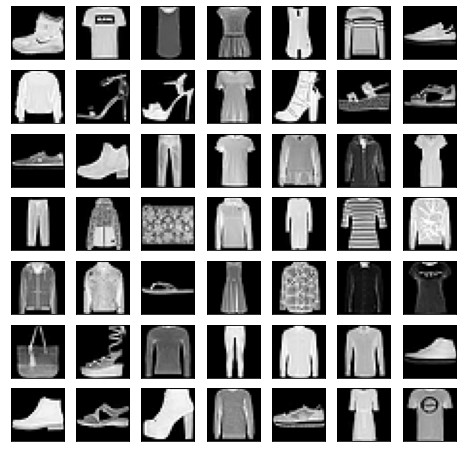

In [9]:
plt.figure(figsize = (8,8))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainImages[i].reshape(28,28), cmap = 'gray')

In [21]:
labelClasses = {0:'TShirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 
                8:'Bag', 9:'AnkleBoot'}

print(labelClasses)

{0: 'TShirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'AnkleBoot'}


Getting the number of each label in the dataset

In [31]:
print("The Train Labels:", (dict(Counter(trainLabels))))
print("The Test Labels:", (dict(Counter(testLabels))))

The Train Labels: {9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}
The Test Labels: {9: 1000, 2: 1000, 1: 1000, 6: 1000, 4: 1000, 5: 1000, 7: 1000, 3: 1000, 8: 1000, 0: 1000}


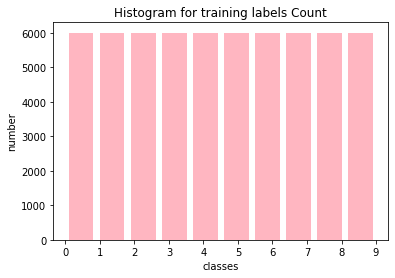

In [50]:
plt.figure()
plt.hist(trainLabels, range = (0, 9), bins = 10, color = '#FFB6C1', rwidth=0.8)
plt.xticks(np.unique(trainLabels))
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Histogram for training labels Count')
plt.show()

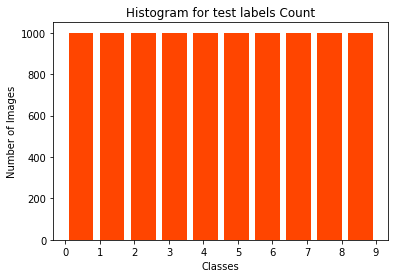

In [54]:
plt.figure()
plt.hist(testLabels, range = (0, 9), bins = 10, color = '#ff4500', rwidth=0.8)
plt.xticks(np.unique(trainLabels))
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Histogram for test labels Count')
plt.show()

Checking if there is any NaN values within the dataset. If there exists, then we will remove those becasue it effect the performance of the any approach that we are using in this project. This is cleaning dataset part of this project. 

In [55]:
trainImagesNan = np.isnan(np.sum(trainImages))
testImagesNan = np.isnan(np.sum(testImages))
trainLabelsNan = np.isnan(np.sum(trainLabels))
testLabelsNan = np.isnan(np.sum(testLabels))

In [56]:
print(trainImagesNan)
print(testImagesNan)
print(trainLabelsNan)
print(testLabelsNan)

False
False
False
False


We can see that the data does not contain any missing values, so there is not need to clean it.

# Neural Network

### Defining the Layers of the Neural Network

In [62]:
NNmodel = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [63]:
NNmodel.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [64]:
NNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Preparing the data for the Neural Network Input

In [ ]:
trainImagesR = trainImages.reshape(trainImages.shape[0],28,28,1)
testImagesR = testImages.reshape(testImages.shape[0],28,28,1)

In [73]:
trainImagesR = trainImagesR.astype('float32')
testImagesR = testImagesR.astype('float32')

trainImagesR = trainImagesR/255
testImagesR = testImagesR/255

In [76]:
trainLabelsR = to_categorical(trainLabels)
testLabelsR = to_categorical(testLabels)

### Training the Model based on prepared data

In [81]:
training = NNmodel.fit(trainImagesR, trainLabelsR, batch_size = 256, epochs = 10, 
                       validation_data= (testImagesR, testLabelsR))

Epoch 1/10
  4/235 [..............................] - ETA: 5s - loss: 1.8761 - accuracy: 0.3457 

C:\Users\Ammad\Anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


235/235 [==============================] - 5s 21ms/step - loss: 0.6505 - accuracy: 0.7746 - val_loss: 0.4998 - val_accuracy: 0.8248
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.4492 - accuracy: 0.8439 - val_loss: 0.4264 - val_accuracy: 0.8492
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.4015 - accuracy: 0.8590 - val_loss: 0.4012 - val_accuracy: 0.8605
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.3734 - accuracy: 0.8675 - val_loss: 0.3811 - val_accuracy: 0.8626
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.3549 - accuracy: 0.8740 - val_loss: 0.3739 - val_accuracy: 0.8674
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.3420 - accuracy: 0.8766 - val_loss: 0.3569 - val_accuracy: 0.8715
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.3277 - accuracy: 0.8820 - val_loss: 0.3607 - val_accuracy: 0.8711
Epoch 8/10

### Evaluating the NN Model on the Test Dataset to check its accuracy

In [ ]:
accuracy = NNmodel.evaluate(testImages, testLabels)

In [86]:
print ('The Accuracy of the Neural Network model is:', accuracy[1]*100, '%')

The Accuracy of the Neural Network model is: 87.84000277519226 %


##### What is the accuracy this method?
The accuracy of this neural network model is about 87.84%. This is a good accuracy to train such type of datasets. 

### Visualizing the Fashion Items with Actual and Predicted labels

In [113]:
probability_model = tf.keras.Sequential([NNmodel, 
                                         tf.keras.layers.Softmax()])
predictedLabels = []
actualLabels = []
predictedProbs = probability_model.predict(testImages)
for index, prob in enumerate(predictedProbs):
    predictedLabels.append(np.argmax(prob))
    actualLabels.append(testLabels[index])
    

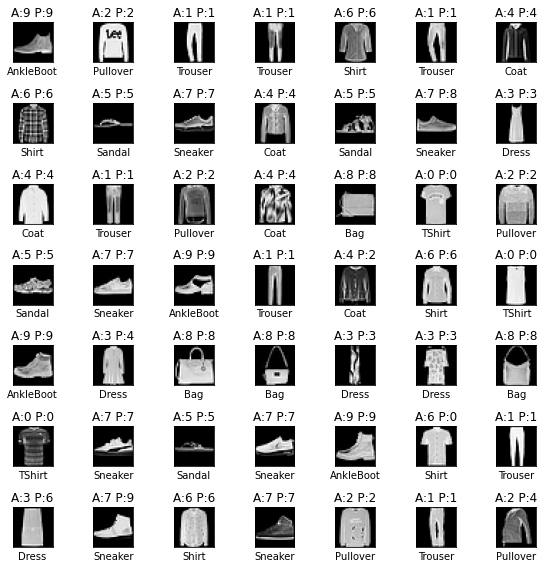

In [144]:
plt.figure(figsize = (8,8))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testImages[i].reshape(28,28), cmap = 'gray')
    plt.title("A:" + str(actualLabels[i]) + " P:" + str(predictedLabels[i]))
    plt.xlabel(labelClasses[actualLabels[i]])
plt.tight_layout()

# K - Nearest Neighbours (KNN)

In [132]:
KNNmodel = KNeighborsClassifier(n_neighbors=3)

In [134]:
KNNmodel.fit(trainImages, trainLabels)

KNeighborsClassifier(n_neighbors=3)

In [135]:
KNNpredicted = KNNmodel.predict(testImages)

In [148]:
print("The accuracy of the KNN is : " + str(accuracy_score(testLabels, KNNpredicted, normalize=True)*100) + " %")

The accuracy of the KNN is : 85.41 %


##### What is the accuracy this method?
The accuracy of K- nearest neighbours are about 85.41%. This is lightly less than the accuracy of neural network. 

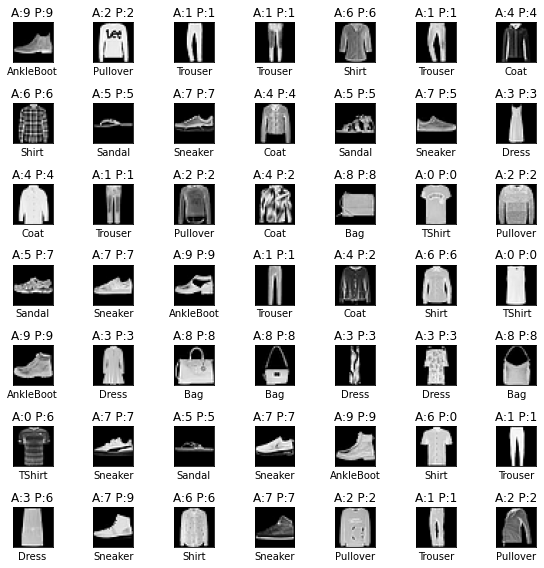

In [145]:
plt.figure(figsize = (8,8))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testImages[i].reshape(28,28), cmap = 'gray')
    plt.title("A:" + str(actualLabels[i]) + " P:" + str(KNNpredicted[i]))
    plt.xlabel(labelClasses[actualLabels[i]])
plt.tight_layout()

### What are the trade-offs of each approach?

Generally in neural network, there are dense layers where the prediction is usually better as compare to others. In this ther other approach we used is KNN. In neural network we can include layers according to our wish but it is not the case in KNN.Due to the dense layers and user interference, the neural network's prediction is better as compare to the KNN. 

### What is the compute performance of each approach?


If we talk about the performance of both the approach then we can say that the KNN will perform fast than neural network becasue in KNN we don't have any dense layer that takes time to process. In short, KNN will compute faster than neural networks. But in neural network as discussed earlier we have dense layers to process. It usually takes more time as compare to other approaches like KNN.  